In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("Q1.csv")
data = data.drop("Unnamed: 0", axis = 1)
data.head()

,x,y,random
0,1.678966,2.274868,0.0
1,2.401438,3.430262,0.0
2,1.394170,2.975215,1.0
3,0.684608,2.154602,0.0
4,0.143203,2.552137,1.0


In [3]:
X = data.drop("random", axis = 1)
y = data["random"]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns = ['x','y'])

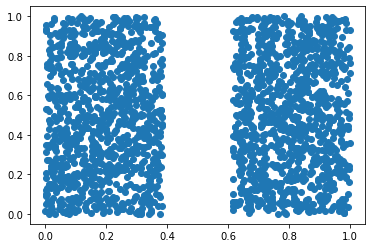

In [4]:
# Visualize the data
plt.scatter(X["x"],X["y"])

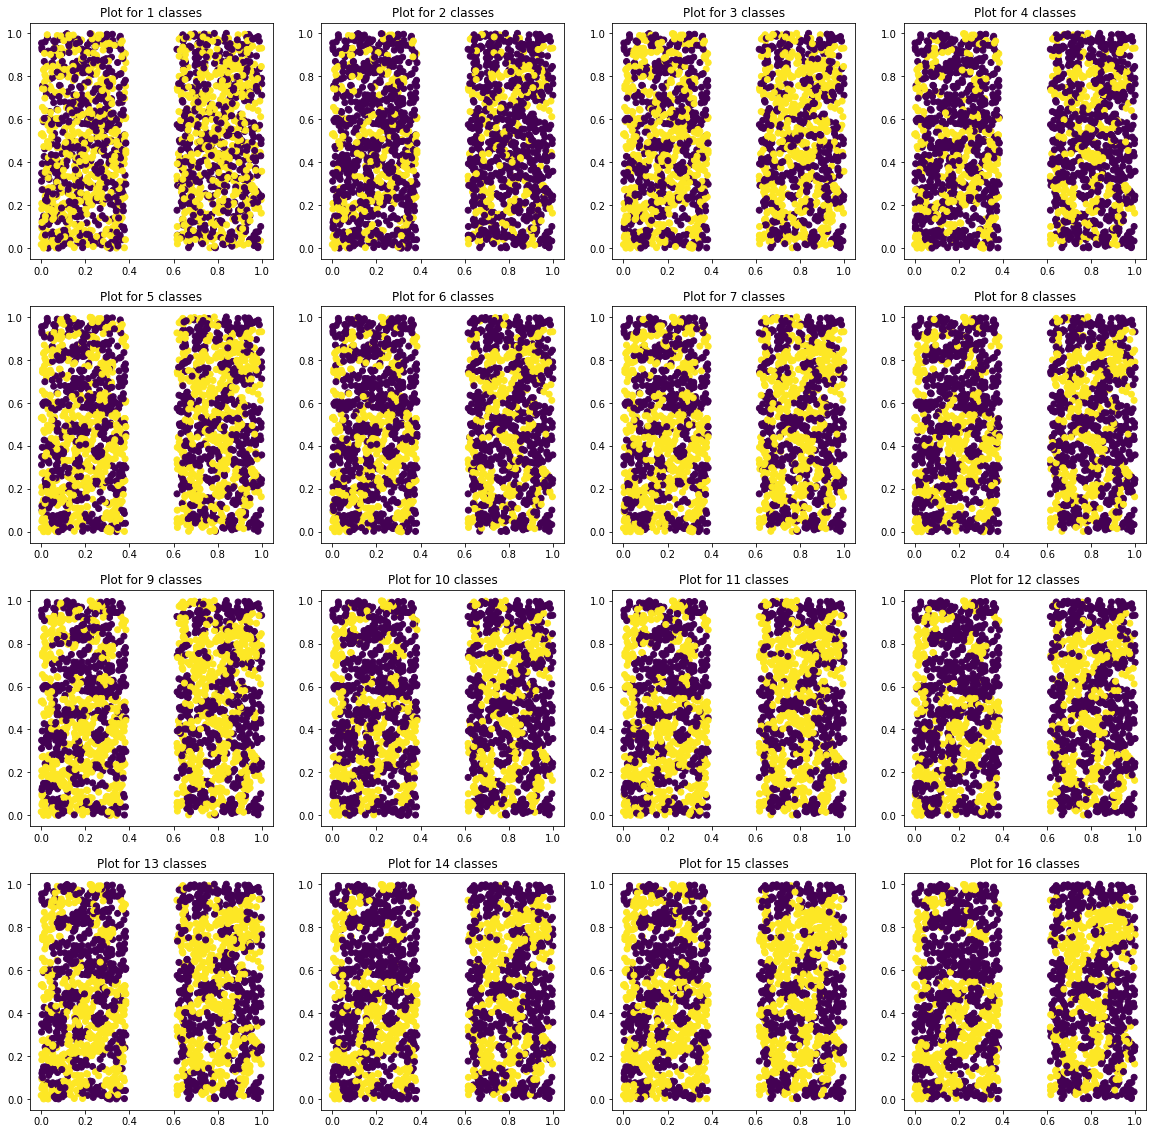

In [5]:
# Change in classification as classes increases
acc = []
plt.subplots(figsize=(20, 20))
for i in range(16):
    model = KNeighborsClassifier(n_neighbors=i+1)
    model.fit(X,y)
    plt.subplot(4,4,i+1)
    plt.scatter(X["x"],X["y"], c = model.predict(X))
    acc.append(accuracy_score(y,model.predict(X)))
    plt.title(str("Plot for "+ str(i+1) + " classes"))
    
plt.show()

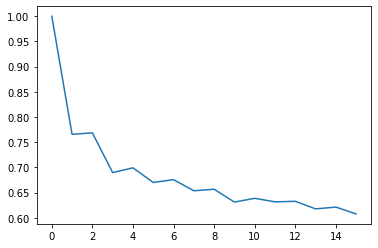

In [6]:
# Accuracy plot

plt.plot(acc)

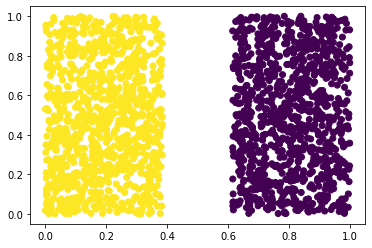

In [7]:
model = KMeans(n_clusters=2)
model.fit(X)
plt.scatter(X["x"],X["y"], c = model.predict(X))

Since accuracy of the first model is the highest, we now train the model the predict the kmeans clusters and check accuracy

In [8]:
outputs = model.predict(X)

model = KNeighborsClassifier(n_neighbors=1)
model.fit(X,outputs)

print("The KNN accuracy is",accuracy_score(model.predict(X),outputs)*100,"%")

The KNN accuracy is 100.0 %
